In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks', color_codes=True)

from tqdm import tqdm
tqdm.pandas()

%matplotlib inline

/projects/rlmolecule/pstjohn/envs/tf2_gpu/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
redf = pd.read_csv('/projects/rlmolecule/pstjohn/atom_spins/redf_spins.csv.gz')
cdf = pd.read_csv('/projects/rlmolecule/pstjohn/atom_spins/cdf_spins.csv.gz')

In [3]:
cdf.head()

,smiles,atom_type,atom_index,spin
0,[Br],Br,0,1.000000
1,BrC12C3C4[C]5C3C1C5C42,Br,0,0.013204
2,BrC12C3C4[C]5C3C1C5C42,C,1,-0.014127
3,BrC12C3C4[C]5C3C1C5C42,C,2,0.076213
4,BrC12C3C4[C]5C3C1C5C42,C,3,-0.102171


In [4]:
# Total number of gas-phase spins
cdf.shape

(8176197, 4)

In [5]:
redf['fractional_spin'] = redf.groupby('smiles').spin.apply(lambda x: x.abs() / x.abs().sum())
# cdf['fractional_spin'] = cdf.groupby('smiles').spin.apply(lambda x: x.abs() / x.abs().sum())

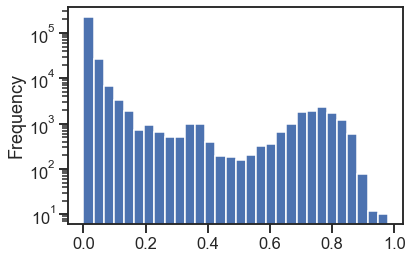

In [6]:
redf['fractional_spin'].plot.hist(bins=30)
plt.yscale('log')